## 1 Introduction
### 1.1 Who's the target audience
This example is intended for audience who are comfortable with developing models using Jupyter notebook. A basic understanding of Azure Machine Learning (Azure ML) experiment is helpful. The purpose here is to give a complete walkthrough on using Jupyter notebook within Azure Machine Studio. Using linear regression as an example, we'll have the opportunity to see how Azure ML's Jupyter notebook can be used to fit a model, set up a web service on Azure ML and consume the service.

If you are new to Jupyter notebook, you can learn more about it from [The IPython Notebook][ipython link] and [Jupyter/IPython Notebook Quick Start Guide][jupyter link]. 

If you are new to Azure ML and want to learn more about it, the [Data Scientists' Guide][guide link] can help you get started.

[ipython link]: http://ipython.org/notebook.html
[jupyter link]: http://jupyter-notebook-beginner-guide.readthedocs.org/en/latest/index.html
[guide link]: https://gallery.cortanaanalytics.com/Experiment/Tutorial-for-Data-Scientists-3

### 1.2 Why Azure ML notebook
The major advantage of using Azure ML notebook is that you won't need to install Python on your local computer. This makes it possible for anyone with internet access to write Python programs using a web browser. Azure ML's notebook is based on the [Anaconda][Anaconda link] distribution, which has many packages installed. 

[Anaconda link]: https://www.continuum.io/

## 2 Data
In this example we'll be using the Boston housing dataset. There are 506 rows in the dataset. The target variable is median home price. There are 13 predictor variables including average number of rooms per dwelling, crime rate by town, etc. More information about this dataset can be found at [UCI][uci link].
[uci link]: https://archive.ics.uci.edu/ml/datasets/Housing

In [11]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline



In [12]:
boston = load_boston()
X = boston.data
y = boston.target
X, X_test, y, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
feature_names = boston.feature_names
print(X.shape)
print(y.shape)
print(feature_names)
print('boston data set object exploring:')
pprint(dir(boston))

(303, 13)
(303,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
boston data set object exploring:
['DESCR',
 '__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clear',
 'copy',
 'data',
 'feature_names',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'target',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']


In [13]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Loading sk learn data into pandas

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
pdHousingData = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= np.append(boston['feature_names'], ['target']))
pdHousingData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# sns.pairplot(pdHousingData)

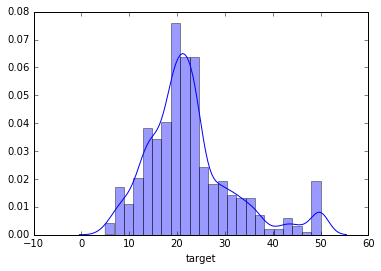

In [16]:
sns.distplot(pdHousingData['target'])

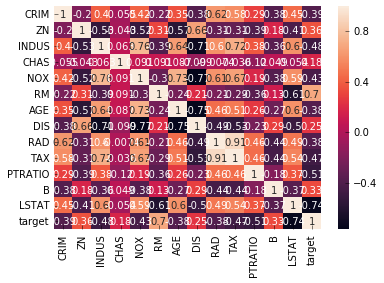

In [19]:
sns.heatmap(pdHousingData.corr(), annot=True)

## 3 Linear regression with sklearn
Now let's assign the data to a new variable "mydata" and use it to develop a linear model. In practice, you may want to spend more time on things like feature engineering and variable selection. In this example, however, we will just fit a model using all variables. 

In [20]:
# initiate the linear model and fit with data
lm = LinearRegression()
lm.fit(X, y)

# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X, y)))

# save intercept and coefficients
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), "Coef": [lm.intercept_] + list(lm.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

The R-squared value is: 0.7502 

     Features       Coef
0   intercept  41.281497
1        CRIM  -0.077558
2          ZN   0.042031
3       INDUS   0.091153
4        CHAS   4.133049
5         NOX -19.976557
6          RM   2.890190
7         AGE   0.016153
8         DIS  -1.264747
9         RAD   0.260171
10        TAX  -0.011125
11    PTRATIO  -0.880556
12          B   0.007024
13      LSTAT  -0.643483


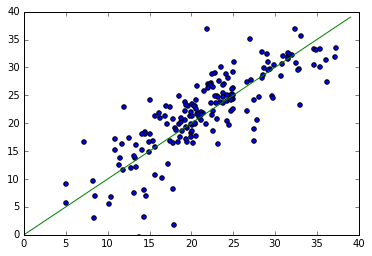

In [48]:
predictions = lm.predict(X_test)
plt.axis(xmin=0,xmax=40,ymin=0,ymax=40)
plt.scatter(y_test,predictions)
plt.plot(range(40),'g')

Next we'll use the model to make predictions. Typically, predictions are done on a validation dataset. Here, however, the training dataset is used for illustraton purposes.

In [49]:
newX = X
newY = y

# predict and create a dataframe
predicted = lm.predict(newX)
predictedDf = pd.DataFrame({"predicted": predicted})
# dataframe for X
newXDf = pd.DataFrame(newX)
newXDf.columns = feature_names
# dataframe for y
newYDf = pd.DataFrame(newY)
newYDf.columns = ['MEDV']
# join X, y and prediction
mydata_with_pd = newXDf.join(newYDf).join(predictedDf)
mydata_with_pd.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,predicted
0,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45,36.2,26.894764
1,0.14103,0.0,13.92,0.0,0.437,5.790,58.0,6.3200,4.0,289.0,16.0,396.90,15.84,20.3,19.819394
2,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22,14.3,16.661445
3,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98,19.3,17.922946
4,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15,18.7,18.151051


With the predicted values, we can calculate metrics such as mean absolute error, root mean squared error, relative absolute error, and relative squared error. 

In [50]:
obs = mydata_with_pd.MEDV
pred = mydata_with_pd.predicted

mae = np.mean(abs(pred-obs))
rmse = np.sqrt(np.mean((pred-obs)**2))
rae = np.mean(abs(pred-obs))/np.mean(abs(obs-np.mean(obs)))
rse = np.mean((pred-obs)**2)/np.mean((obs-np.mean(obs))**2)

print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

Mean Absolute Error: 2.938568
Root Mean Squared Error: 4.263022
Relative Absolute Error: 0.484363
Relative Squared Error: 0.249850


## 4 Web service

### 4.1 Set up a web service
After developing the model, we can deploy it as a service so others can use it. The "azureml" package's services subpackage can be used for this purpose. The following lines of code are setting up a web service named "demoservice".

In [51]:
# extract workspace info
from azureml import Workspace
ws = Workspace()
workdspace_id = ws.workspace_id
authorization_token = ws.authorization_token

# set up web service
from azureml import services
@services.publish(workdspace_id, authorization_token)
@services.types(crim=float, zn=float, indus=float, chas=float, nox=float, rm=float, age=float, 
                dis=float, rad=float, tax=float, ptratio=float, black=float, lstat=float)
@services.returns(float)
def demoservice(crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat):
    # predict the label
    feature_vector = [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat]
    return lm.predict(feature_vector)

### 4.2 Consume a web service
After running the above code to set up a web service, we can consume it like the following example. This way of consuming the web service works only during the current session.

In [52]:
demoservice(0.00632, 18, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 396.9, 4.98)

29.462195987089871

To consume the web service out of the current session, we can use Python scripts by specifying the service url and the api\_key. The following lines of code return the url, the api\_key, the help\_url, and the service\_id. 

In [53]:
service_url = demoservice.service.url 
api_key = demoservice.service.api_key
help_url = demoservice.service.help_url
service_id = demoservice.service.service_id

The purpose of the following code is to wait a few seconds so that the web service is successfully desployed and ready for consumption.

In [54]:
# wait 
import time
time.sleep(10)

The code below can be used to consume the web service. For illustration purpose the data for two records are provided.

In [55]:
import urllib2
# If you are using Python 3+, import urllib instead of urllib2

import json 

data =  {

        "Inputs": {

                "input1":
                {
                    "ColumnNames": ["crim", "zn", "lstat", "age", "tax", "rad", "black", 
                                    "chas", "nox", "rm", "indus", "ptratio", "dis"],
                    "Values": [ [ "0.00632", "18", "4.98", "65.2", "296", "1", "396.9", 
                                 "0", "0.538", "6.575", "2.31", "15.3", "4.09" ], 
                               ["0.02731", "0", "9.14", "78.9", "242", "2", "396.9", 
                                "0", "0.469", "6.421", "7.07", "17.8", "4.9671"],
                            ]
                },        },
            "GlobalParameters": {
}
    }

body = str.encode(json.dumps(data))

url = service_url
api_key = api_key # Replace this with the API key for the web service

headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib2.Request(url, body, headers) 

try:
    response = urllib2.urlopen(req)

    # If you are using Python 3+, replace urllib2 with urllib.request in the above code:
    # req = urllib.request.Request(url, body, headers) 
    # response = urllib.request.urlopen(req)

    result = response.read()
    print(result) 
except urllib2.HTTPError, error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, 
    # which are useful for debugging the failure
    print(error.info())

    print(json.loads(error.read()))                 

{"Results":{"output1":{"type":"table","value":{"Values":[["29.4621959870899"],["25.1658357600726"]]}},"output2":{"type":"table","value":{"Values":[["data:text/plain,Execution OK\r\n",null]]}}}}


The above service consumption code is based on those at the help\_url, which contains, among others, sample code written in C#, Python, and R for consuming the web service. To check out the code for yourself, copy the help\_url value to a new browser to open the web page. Scroll down the newly opened page till you see the section "Sample Code" as in [Figure 1][pic 1]. Click on the Python tab and you'll see the sample code. Two changes were made in the above code:
    1. fill in the url and api\_key with the values returned for the current web service, and 
    2. enter the values for the first two records. Notice that the order of the columns here may be different from 
    that in your definition of the web service. 

[![Python Script][pic 1]][pic 1] Figure 1

[pic 1]: https://az712634.vo.msecnd.net/notebooks/d132b658-c5bd-11e5-97a3-0ba617781c98.PNG

### 4.3 Re-publish a web service
By default, when you run the code in section 4.1 multiple times different services will be generated. They will have different url, api\_key, help\_url, and service\_id. If you just want to re-publish the same service, you need to specify the service\_id as shown below. This way, you can use the same code for consumption without having to change the url and api\_key.

In [56]:
from azureml import services
@services.publish(workdspace_id, authorization_token)
@services.service_id(service_id)
@services.types(crim=float, zn=float, indus=float, chas=float, nox=float, rm=float, age=float, 
                dis=float, rad=float, tax=float, ptratio=float, black=float, lstat=float)
@services.returns(float)
def demoservice(crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat):
    # predict the label
    feature_vector = [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat]
    return lm.predict(feature_vector)

## 5 Conclusion
Through this example, you've learned how to fit a model, deploy the model on Azure, and consume the service, all using Azure ML's Jupyter notebook. 

In addition to carrying out the entire model development process with Azure ML notebook, you can also use it as a supplement to Azure ML's experiments. Using Azure ML experiments you can develop a wide variety of models and easily compare their performance. However, certain tasks may not be accomplished there. Examples include certain feature selection techniques, advanced visualization options, a wide variety of GBM models, and time series analysis. For these tasks, Python offers a good alternative and Azure ML's Jupyter notebook allows you to write and run Python programs on the cloud.

As another example of using Jupyter noteebook, you can test out Python code that will be used in the "Execute Python Script" module in an Azure ML Studio experiment.

---  
Created by a Microsoft Employee.  
Copyright (C) Microsoft. All Rights Reserved.